## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP - Sparks Foundation
                    -Divya Kuruvada

Task 1: 
    
What will be the predicted score of the student, if the student studies for 9.5 hours in a day

In [137]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings

In [138]:
#Loading the dataset and displaying the first 5 rows

df=pd.read_csv('Task-1_Data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### BASIC EXPLORATORY DATA ANALYSIS

In [139]:
df.shape

(25, 2)

There are 25 rowa and 2 columns in the given dataset

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [160]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values

In [142]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [143]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We see high positive correlation between two plots which indicates strong linear relationship between the two variables

##### Checking for Outliers in the dataset

<AxesSubplot:>

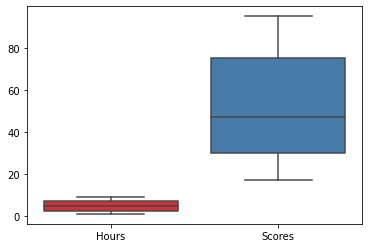

In [144]:
sns.boxplot(data=df,palette="Set1")

There are no outliers inthe given data set

###### Checking if there is any relationship between two attributes

<AxesSubplot:xlabel='Hours'>

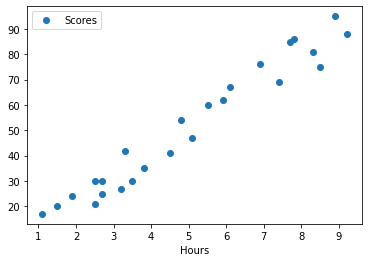

In [145]:
df.plot(x="Hours",y="Scores",style="o")

From the above Graph we can clearly see the positive linear relationship b/w no.of Hours studied and Scores obtained

#### Performing Simple linear regression

Storing independent and target variables X and y

In [146]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [147]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [148]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Splitting dataset into train and test

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

Training the Algorithm

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

Visualising the model

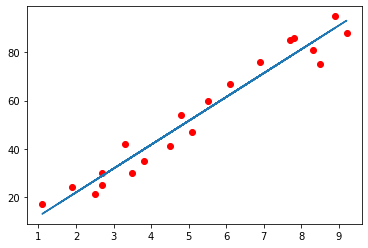

In [161]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
# Plotting for the train data
plt.scatter(X_train,y_train,color='red')
plt.plot(X,line)
plt.show()

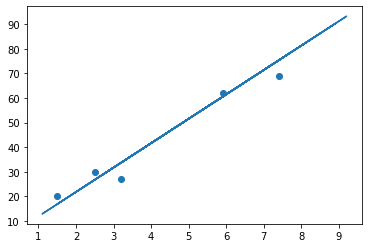

In [152]:
# Plotting for the test data
plt.scatter(X_test,y_test)
plt.plot(X,line);
plt.show()

Making Predictions

In [154]:
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [155]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing Actual vs Predicted data

In [156]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_res

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


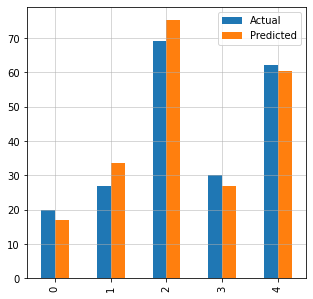

In [157]:
df_res.plot(kind="bar", figsize=(5,5))
plt.grid(which="major", linewidth="0.5")
plt.grid(which="minor", linewidth="0.5")
plt.show()

In [158]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = ", hours)
print("Predicted Score = ",own_pred)

No of Hours =  9.25
Predicted Score =  [93.69173249]


##### Evaluating the model

In [159]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


###### Conclusion:

###### By using linear regression model we successfully predicted that score of a student who studied 9.5 hours is 93.7% approximately